# 📊 GDP Per Capita Data Exploration & Cleaning

In this notebook, we will explore and clean the World Bank GDP per capita dataset.

## 🎯 Objectives:
- Understand the structure of the dataset
- Analyze missing values
- Basic statistical properties
- Data cleaning procedures

In [39]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [40]:
# Load the dataset (using relative path - suitable for GitHub)
df = pd.read_csv('../data/gdp-per-capita-worldbank.csv')

print(f"📈 Dataset loaded successfully!")
print(f"📊 Dimensions: {df.shape[0]} rows x {df.shape[1]} columns")

📈 Dataset loaded successfully!
📊 Dimensions: 7063 rows x 4 columns


## 🔍 Dataset Structure Analysis

In [41]:
# Display first 5 rows
print("📋 First 5 rows:")
display(df.head())

📋 First 5 rows:


,Entity,Code,Year,"GDP per capita, PPP (constant 2021 international $)"
0,Afghanistan,AFG,2000,1617.8264
1,Afghanistan,AFG,2001,1454.1108
2,Afghanistan,AFG,2002,1774.3087
3,Afghanistan,AFG,2003,1815.9282
4,Afghanistan,AFG,2004,1776.9182


In [42]:
# Column information
print("📄 Column Information:")
print(df.info())

📄 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7063 entries, 0 to 7062
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               7063 non-null   object 
 1   Code                                                 6605 non-null   object 
 2   Year                                                 7063 non-null   int64  
 3   GDP per capita, PPP (constant 2021 international $)  7063 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 220.8+ KB
None


In [43]:
# Check column names
print("📝 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

📝 Column Names:
1. Entity
2. Code
3. Year
4. GDP per capita, PPP (constant 2021 international $)


In [44]:
# Number of unique countries
print(f"🌍 Total number of countries/regions: {df['Entity'].nunique()}")
print(f"📅 Year range: {df['Year'].min()} - {df['Year'].max()}")
print(f"📊 Total data points: {len(df)}")

🌍 Total number of countries/regions: 213
📅 Year range: 1990 - 2023
📊 Total data points: 7063


## 🔎 Missing Values Analysis

In [45]:
# Missing values check
print("❌ Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})

display(missing_df[missing_df['Missing Count'] > 0])

❌ Missing Values Analysis:


,Missing Count,Missing Percentage
Code,458,6.484497


In [46]:
# Use the actual GDP column name
gdp_column = [col for col in df.columns if 'GDP' in col or 'capita' in col or col not in ['Entity', 'Code', 'Year']][0]
print(f"💰 GDP column: {gdp_column}")

# Countries with missing GDP values
missing_gdp = df[df[gdp_column].isnull()]
print(f"\n❌ Number of records without GDP data: {len(missing_gdp)}")

if len(missing_gdp) > 0:
    print("\n🔍 Some countries with missing GDP data:")
    print(missing_gdp[['Entity', 'Year']].head(10))

💰 GDP column: GDP per capita, PPP (constant 2021 international $)

❌ Number of records without GDP data: 0


## 📊 Basic Statistical Analysis

In [47]:
# Basic statistics
print("📈 GDP Per Capita Basic Statistics:")
display(df[gdp_column].describe())

📈 GDP Per Capita Basic Statistics:


count      7063.000000
mean      21567.903487
std       23684.139939
min         510.822800
25%        4350.824950
50%       12562.891000
75%       31977.909000
max      174339.080000
Name: GDP per capita, PPP (constant 2021 international $), dtype: float64

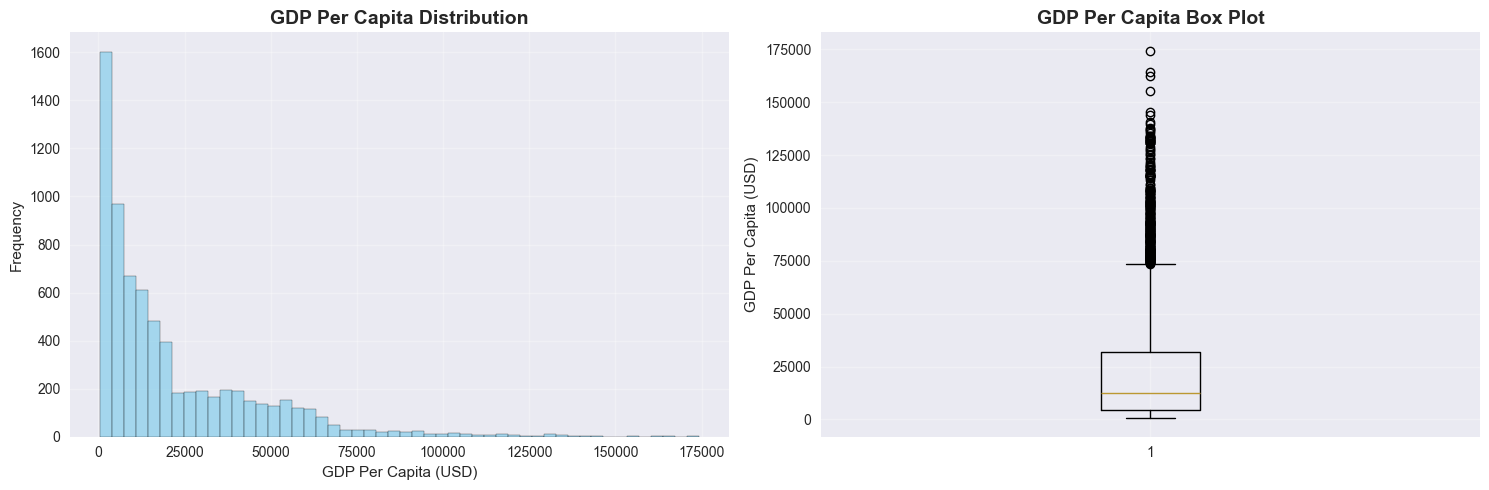


🔍 Number of outliers: 267 (3.8%)


In [48]:
# Visualize GDP distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df[gdp_column].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('GDP Per Capita Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('GDP Per Capita (USD)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df[gdp_column].dropna(), vert=True)
axes[1].set_title('GDP Per Capita Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('GDP Per Capita (USD)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Outlier analysis
Q1 = df[gdp_column].quantile(0.25)
Q3 = df[gdp_column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[gdp_column] < lower_bound) | (df[gdp_column] > upper_bound)]
print(f"\n🔍 Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

## 🌍 Countries and Years Analysis

In [49]:
# Countries with most and least data points
country_data_count = df.groupby('Entity').size().sort_values(ascending=False)

print("🏆 Countries with most data points:")
print(country_data_count.head(10))

print("\n⚠️ Countries with least data points:")
print(country_data_count.tail(10))

🏆 Countries with most data points:
Entity
Albania                34
Andorra                34
Algeria                34
Angola                 34
Antigua and Barbuda    34
Bahrain                34
Argentina              34
Armenia                34
Aruba                  34
Australia              34
dtype: int64

⚠️ Countries with least data points:
Entity
San Marino                      26
Afghanistan                     24
Curacao                         24
United States Virgin Islands    21
Cayman Islands                  18
Faeroe Islands                  16
Kosovo                          16
Sint Maarten (Dutch part)       15
Turks and Caicos Islands        13
Djibouti                        11
dtype: int64


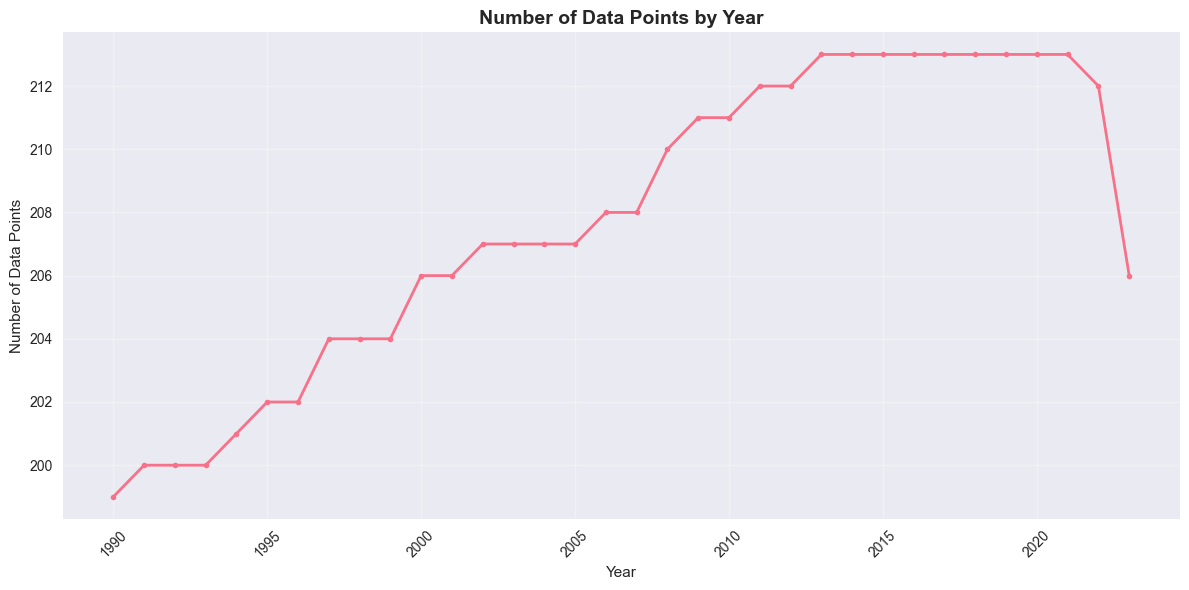

📊 Year with most data: 2013 (213 countries)
📊 Year with least data: 1990 (199 countries)


In [50]:
# Number of data points by year
yearly_count = df.groupby('Year').size()

plt.figure(figsize=(12, 6))
yearly_count.plot(kind='line', marker='o', linewidth=2, markersize=4)
plt.title('Number of Data Points by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"📊 Year with most data: {yearly_count.idxmax()} ({yearly_count.max()} countries)")
print(f"📊 Year with least data: {yearly_count.idxmin()} ({yearly_count.min()} countries)")

## 🧹 Data Cleaning

In [51]:
# Data size before cleaning
print(f"🔢 Data size before cleaning: {df.shape}")

# 1. Remove missing GDP values
df_clean = df.dropna(subset=[gdp_column]).copy()
print(f"✅ Missing GDP values removed: {df_clean.shape}")

# 2. Check for negative GDP values
negative_gdp = df_clean[df_clean[gdp_column] < 0]
if len(negative_gdp) > 0:
    print(f"⚠️ Records with negative GDP: {len(negative_gdp)}")
    df_clean = df_clean[df_clean[gdp_column] >= 0]
    print(f"✅ Negative values removed: {df_clean.shape}")
else:
    print("✅ No negative GDP values found")

# 3. Check for extreme outliers (very high values)
extreme_outliers = df_clean[df_clean[gdp_column] > 200000]  # Above 200k USD
if len(extreme_outliers) > 0:
    print(f"\n🔍 Extremely high GDP values ({len(extreme_outliers)} records):")
    print(extreme_outliers[['Entity', 'Year', gdp_column]].head())

print(f"\n🎉 Final cleaned data size: {df_clean.shape}")
print(f"📉 Percentage of removed records: {((len(df) - len(df_clean)) / len(df) * 100):.1f}%")

🔢 Data size before cleaning: (7063, 4)
✅ Missing GDP values removed: (7063, 4)
✅ No negative GDP values found

🎉 Final cleaned data size: (7063, 4)
📉 Percentage of removed records: 0.0%


In [52]:
# Summary of cleaned data
print("📊 Cleaned Data Summary:")
print(f"🌍 Number of countries: {df_clean['Entity'].nunique()}")
print(f"📅 Year range: {df_clean['Year'].min()} - {df_clean['Year'].max()}")
print(f"💰 GDP range: ${df_clean[gdp_column].min():,.0f} - ${df_clean[gdp_column].max():,.0f}")
print(f"📈 Average GDP: ${df_clean[gdp_column].mean():,.0f}")
print(f"📊 Median GDP: ${df_clean[gdp_column].median():,.0f}")

📊 Cleaned Data Summary:
🌍 Number of countries: 213
📅 Year range: 1990 - 2023
💰 GDP range: $511 - $174,339
📈 Average GDP: $21,568
📊 Median GDP: $12,563


In [53]:
# Create cleaned dataset by removing missing GDP values
df_clean = df.dropna(subset=[gdp_column]).copy()

# Remove negative GDP values if any
df_clean = df_clean[df_clean[gdp_column] >= 0]

print(f"📊 Cleaned dataset size: {df_clean.shape}")
print(f"📈 Average GDP: ${df_clean[gdp_column].mean():,.0f}")
print(f"📊 Median GDP: ${df_clean[gdp_column].median():,.0f}")

# Save cleaned dataset
df_clean.to_csv('../data/gdp_cleaned.csv', index=False)
print("💾 Cleaned data saved as '../data/gdp_cleaned.csv'!")

# Set global variable for usage
GDP_COLUMN = gdp_column
print(f"\n🔧 GDP column name: {GDP_COLUMN}")
print("✅ Data exploration and cleaning completed!")

📊 Cleaned dataset size: (7063, 4)
📈 Average GDP: $21,568
📊 Median GDP: $12,563
💾 Cleaned data saved as '../data/gdp_cleaned.csv'!

🔧 GDP column name: GDP per capita, PPP (constant 2021 international $)
✅ Data exploration and cleaning completed!
